<a href="https://colab.research.google.com/github/siddharthramagiri/Machine-Learning/blob/main/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
iris_outcomes = pd.crosstab(index=df['Species'],columns='count')
iris_outcomes

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [22]:
cols = df[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
X = df.iloc[:,0:5]
y = df['Species']
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3,test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [60]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix
confusion_map = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

Text(0.5, 23.52222222222222, 'Predicted Values')

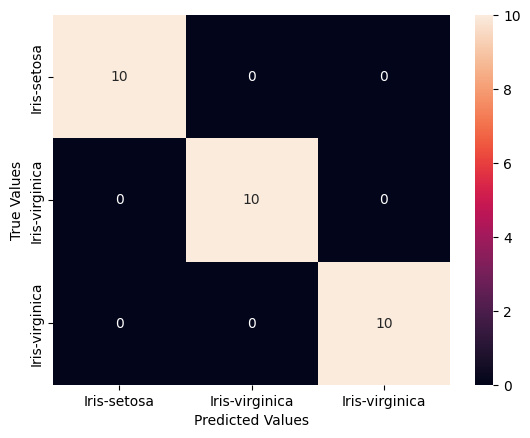

In [47]:
sns.heatmap(confusion_map, annot=True, xticklabels=['Iris-setosa','Iris-virginica','Iris-virginica'], yticklabels=['Iris-setosa','Iris-virginica','Iris-virginica'])
plt.ylabel("True Values")
plt.xlabel("Predicted Values")

In [49]:
classification_report(y_test,y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00        10\n Iris-virginica       1.00      1.00      1.00        10\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

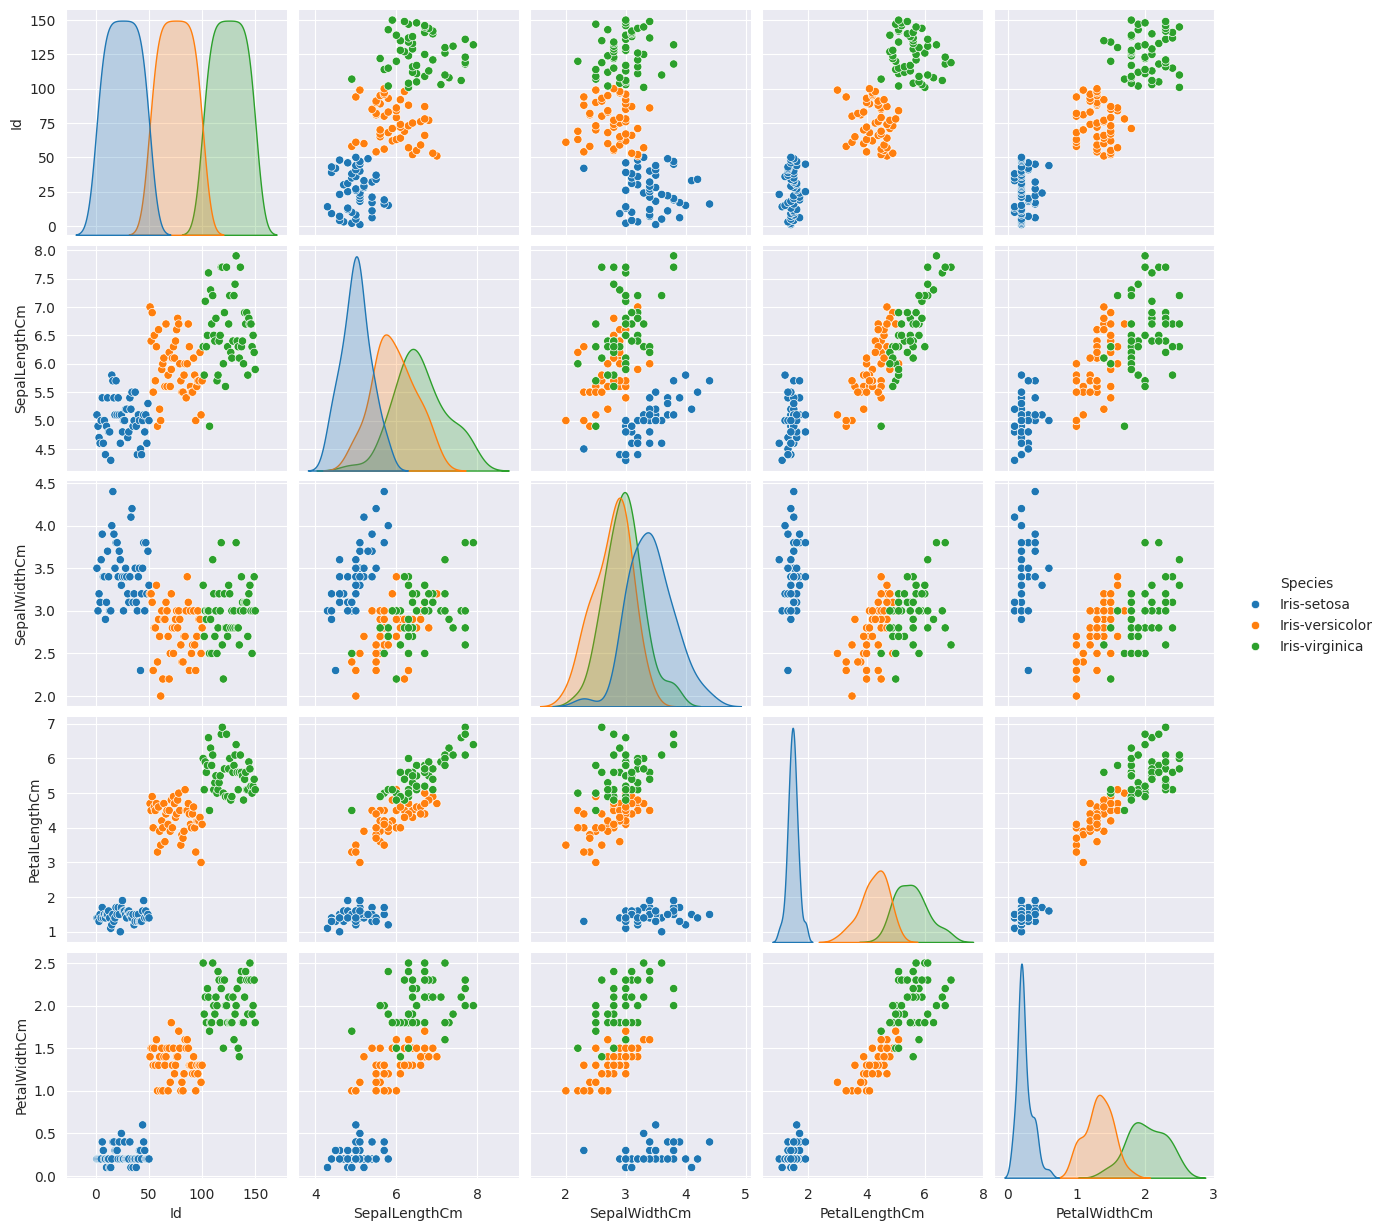

In [59]:
sns.set_style('darkgrid')
sns.pairplot(data=df,hue='Species')
plt.show()